<a href="https://colab.research.google.com/github/AlaaElshorbagy/FakeNewsDetector/blob/main/NLP_Sarcasm_Detector_Helper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sarcasm Detector

# Data Generation

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --id 1ytPDo88FEC2ArOjdqErAiarAZBNJzEJz

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ytPDo88FEC2ArOjdqErAiarAZBNJzEJz
To: /content/SarcasmDetect.json
100% 6.06M/6.06M [00:00<00:00, 153MB/s]


In [ ]:
import pandas as pd

df = pd.read_json('./SarcasmDetect.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## Remove all records with no headline text

In [ ]:
df = df[df['headline'] != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 894.3+ KB


In [ ]:
df.shape

(28619, 3)

In [ ]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install contractions
!pip install textsearch
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 894.3+ KB


In [ ]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
import tensorflow_hub as hub
import nltk
import matplotlib.pyplot as plt

import nltk
import contractions
import re
import tqdm

from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import transformers

(0.0, 150.0)

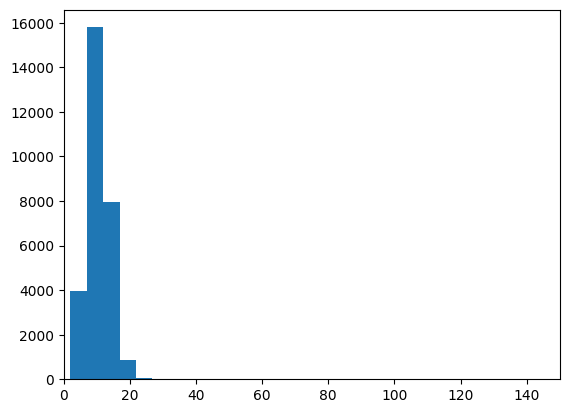

In [ ]:
plt.hist([len(doc.split()) for doc in df['headline']], bins=30);
plt.xlim([0,150 ])

In [ ]:
[x for x in [len(doc.split()) for doc in df['headline']] if x>25]

[29, 27, 27, 151, 31, 26, 28, 38, 39, 28, 27, 30, 29]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['headline']], df['is_sarcastic'], test_size=0.3, random_state=42)

In [ ]:
def normalize_document(doc):
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', ' ', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()

    return doc

def normalize_corpus(docs):
    norm_docs = []
    for doc in tqdm.tqdm(docs):
        norm_doc = normalize_document(doc)
        norm_docs.append(norm_doc)

    return norm_docs

In [ ]:
train_clean_text = normalize_corpus(X_train['headline'].values)
test_clean_text = normalize_corpus(X_test['headline'].values)

100%|██████████| 8586/8586 [00:00<00:00, 56169.07it/s]


In [ ]:
train_clean_text.shape

# Create a model: Bert

In [ ]:
def create_bert_input_features(tokenizer, docs, max_seq_length):

    all_ids, all_masks, all_segments= [], [], []
    for doc in tqdm.tqdm(docs, desc="Converting docs to features"):

        tokens = tokenizer.tokenize(doc)

        if len(tokens) > max_seq_length-2:
            tokens = tokens[0 : (max_seq_length-2)]
        # with newer versions of transformers you don't need to explicitely add CLS and SEP
        # they are automatically added by the tokenizer
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        ids = tokenizer.convert_tokens_to_ids(tokens)
        masks = [1] * len(ids) # [1,1,1.....] # < 500 ones

        # Zero-pad up to the sequence length.
        while len(ids) < max_seq_length:
            ids.append(0)
            masks.append(0)

        segments = [0] * max_seq_length # [0,0,0...] # 500 zeros
        all_ids.append(ids)
        all_masks.append(masks)
        all_segments.append(segments)

    encoded = np.array([all_ids, all_masks, all_segments])

    return encoded

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
MAX_SEQ_LENGTH = 40

train_features_ids, train_features_masks, train_features_segments = create_bert_input_features(tokenizer,
                                                                                               train_clean_text,
                                                                                               max_seq_length=MAX_SEQ_LENGTH)
#test_features = create_bert_input_features(tokenizer, test_reviews, max_seq_length=MAX_SEQ_LENGTH)
print('Train Features:', train_features_ids.shape, train_features_masks.shape, train_features_segments.shape)


Converting docs to features: 100%|██████████| 20033/20033 [00:10<00:00, 1950.64it/s]


Train Features: (20033, 40) (20033, 40) (20033, 40)


In [ ]:
inp_id = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_ids")
inp_mask = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_masks")
inp_segment = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_segment_ids")
inputs = [inp_id, inp_mask, inp_segment]

hidden_state = transformers.TFBertModel.from_pretrained('bert-base-uncased')(inputs)
pooled_output = hidden_state[1]

dense1 = tf.keras.layers.Dense(256, activation='relu')(pooled_output)
drop1 = tf.keras.layers.Dropout(0.25)(dense1)
dense2 = tf.keras.layers.Dense(256, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(0.25)(dense2)

output = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model = tf.keras.Model(inputs=inputs, outputs=output)

model.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-5,
                                           epsilon=1e-08),
              loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 bert_input_ids (InputLayer)    [(None, 40)]         0           []                               
                                                                                                  
 bert_input_masks (InputLayer)  [(None, 40)]         0           []                               
                                                                                                  
 bert_segment_ids (InputLayer)  [(None, 40)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['bert_input_ids[0][0]',         
                                thPoolingAndCrossAt               'bert_input_masks[0][0]',   

In [ ]:
model.fit([train_features_ids,
           train_features_masks,
           train_features_segments], y_train,
          epochs=5, # run more only if needed as this takes a long time
          batch_size=25, # reduce this in case you get GPU OOM error
          shuffle=True,
          verbose=1)

Epoch 1/5
802/802 [==============================] - 254s 244ms/step - loss: 0.3239 - accuracy: 0.8589
Epoch 2/5
802/802 [==============================] - 184s 229ms/step - loss: 0.1463 - accuracy: 0.9450
Epoch 3/5
802/802 [==============================] - 196s 244ms/step - loss: 0.0673 - accuracy: 0.9775
Epoch 4/5
802/802 [==============================] - 189s 235ms/step - loss: 0.0310 - accuracy: 0.9896
Epoch 5/5
802/802 [==============================] - 178s 221ms/step - loss: 0.0233 - accuracy: 0.9925


In [ ]:
test_features_ids, test_features_masks, test_features_segments = create_bert_input_features(tokenizer,
                                                                                            test_clean_text,
                                                                                            max_seq_length=MAX_SEQ_LENGTH)
print('Test Features:', test_features_ids.shape, test_features_masks.shape, test_features_segments.shape)

Converting docs to features: 100%|██████████| 8586/8586 [00:05<00:00, 1704.57it/s]


Test Features: (8586, 40) (8586, 40) (8586, 40)


# Evaluate the model

In [ ]:
predictions = [1 if pr > 0.5 else 0
                   for pr in model.predict([test_features_ids,
                                            test_features_masks,
                                            test_features_segments], verbose=0).ravel()]

print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

Accuracy: 92.66%
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4455
           1       0.91      0.94      0.92      4131

    accuracy                           0.93      8586
   macro avg       0.93      0.93      0.93      8586
weighted avg       0.93      0.93      0.93      8586



,0,1
0,4090,365
1,265,3866


In [ ]:
model.save_weights('bert_ft_wts.h5')

In [ ]:
df_test = pd.DataFrame({'headline': test_clean_text, 'is_sarcastic': y_test, 'predictions': predictions} )
df_test

,headline,is_sarcastic,predictions
27927,states slow to shut down weak teacher educatio...,0,0
1660,drone places fresh kill on steps of white house,1,1
96,report majority of instances of people getting...,1,1
6237,sole remaining lung filled with rich satisfyin...,1,1
6650,the gop s stockholm syndrome,0,0
...,...,...,...
3388,nation feels first only pang of sympathy for z...,1,1
3310,things to make the most out of your high schoo...,0,0
25714,winning lottery numbers so obvious in hindsight,1,1
21391,nuns and advocates protest planned pipeline by...,0,0


## False Negative

In [ ]:
df_test[(df_test['is_sarcastic'] -df_test['predictions'] == 1)]

,headline,is_sarcastic,predictions
23948,track winnings reinvested in blackjack futures,1,0
2061,facebook addresses accusations of silencing co...,1,0
16022,"all-american ticket hails from alaska, panama ...",1,0
26618,'employees must wash hands' signs top iraqi ho...,1,0
1388,japanese prime minister resigns to seek reveng...,1,0
...,...,...,...
5689,tokyo portal outage delays millions of japanes...,1,0
6685,obama's fifth gulf coast visit really helps a lot,1,0
483,"well, neighbors just got a pit bull",1,0
9287,parents fight to remove cartoon characters fro...,1,0


In [ ]:
df_test[(df_test['is_sarcastic'] -df_test['predictions'] == 1)]['headline'].values[:10]

array(['track winnings reinvested in blackjack futures',
       "facebook addresses accusations of silencing conservative voices by deleting barack obama's profile",
       'all-american ticket hails from alaska, panama canal zone',
       "'employees must wash hands' signs top iraqi hospital wish list",
       'japanese prime minister resigns to seek revenge on man who killed his family',
       'obama family adopts 44-year-old portuguese water man',
       "roy moore on pedophilia accusers: 'these women are only discrediting me now because shifting sociocultural norms have created an environment in which assault allegations are taken seriously'",
       'mall santa crying hysterically in photo with toddler',
       'fist-pumping jared kushner leaves jerusalem embassy refreshed and ready to solve next global crisis',
       'george jefferson honored for black television history month'],
      dtype=object)

## False Positive

In [ ]:
df_test[(df_test['is_sarcastic'] -df_test['predictions'] == -1)]

,headline,is_sarcastic,predictions
27927,states slow to shut down weak teacher educatio...,0,1
22778,band targeted in paris attacks makes emotional...,0,1
14361,massive filament snakes across sun's surface,0,1
19326,brad pitt goes completely gray for new movie,0,1
1288,most long island politician ever attacks oppon...,0,1
...,...,...,...
3168,"prince cremated, private ceremony held with fa...",0,1
584,"homeless pitbull couldn't stop trembling, unti...",0,1
13651,rolling stone reporter recalls the moment her ...,0,1
3264,paul mccartney admits the beatles felt 'threat...,0,1


In [ ]:
df_test[(df_test['is_sarcastic'] -df_test['predictions'] == -1)]['headline'].values[:10]

array(['states slow to shut down weak teacher education programs',
       'band targeted in paris attacks makes emotional return to finish concert',
       "massive filament snakes across sun's surface",
       'brad pitt goes completely gray for new movie',
       'most long island politician ever attacks opponent for not loving billy joel enough',
       "outside the rnc, this crisis center is addressing one of our nation's biggest problems",
       'librarian who amassed millions by living humbly leaves entire fortune to college',
       'desperate trump campaign turns to congress for support in attacks against khan family',
       'powerball ticket sold with all winning numbers in $421 million jackpot',
       'teen accepted into 113 colleges chooses full ride to hbcu'],
      dtype=object)

## Test the model yourself!

In [ ]:
def predict_fn(headlines):
  title_clean_text = normalize_corpus(headlines)
  _features_ids, _features_masks, _features_segments = create_bert_input_features(tokenizer,
                                                                                            title_clean_text,
                                                                                        max_seq_length=MAX_SEQ_LENGTH)
  predictions = [1 if pr > 0.5 else 0
                   for pr in model_.predict([_features_ids, _features_masks, _features_segments], verbose=0).ravel()]
  return predictions


In [ ]:
H = ["This team will totally impress everyone"]
predict_fn(H)

Converting docs to features: 100%|██████████| 1/1 [00:00<00:00, 1767.51it/s]


[0]

In [ ]:
H = ["Extraordinary Feat: Person Successfully Multitasks by Simultaneously Texting and Breathing"]
predict_fn(H)

Converting docs to features: 100%|██████████| 1/1 [00:00<00:00, 1208.04it/s]


[1]

# Failed attempt to use a Fine tuned model

In [ ]:
from transformers import pipeline
MODEL = "jy46604790/Fake-News-Bert-Detect"
clf = pipeline("text-classification", model=MODEL, tokenizer=MODEL)


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
def predictions_fn (result):
  predictions = []
  for entry in result:
    if entry['label'] == 'LABEL_1':
      predictions.append(0)
    else:
      predictions.append(1)
  return predictions


In [ ]:
text = ["Indonesian police have recaptured a U.S. citizen who escaped a week ago from an overcrowded prison on the holiday island of Bali, the jail s second breakout of foreign inmates this year.  Cristian Beasley from California was rearrested on Sunday, Badung Police chief Yudith Satria Hananta said, without providing further details.  Beasley was a suspect in crimes related to narcotics but had not been sentenced when he escaped from Kerobokan prison in Bali last week. The 32-year-old is believed to have cut through bars in the ceiling of his cell before scaling a perimeter wall of the prison in an area being refurbished. The Kerobokan prison, about 10 km (six miles) from the main tourist beaches in the Kuta area, often holds foreigners facing drug-related charges. Representatives of Beasley could not immediately be reached for comment. In June, an Australian, a Bulgarian, an Indian","and a Malaysian tunneled to freedom about 12 meters (13 yards) under Kerobokan prison s walls. The Indian and the Bulgarian were caught soon after in neighboring East Timor, but Australian Shaun Edward Davidson and Malaysian Tee Kok King remain at large. Davidson has taunted authorities by saying he was enjoying life in various parts of the world, in purported posts on Facebook.  Kerobokan has housed a number of well-known foreign drug convicts, including Australian Schappelle Corby, whose 12-1/2-year sentence for marijuana smuggling got huge media attention."]
result = clf(text)
result
#[{'label': 'LABEL_1', 'score': 0.9994995594024658}]

[{'label': 'LABEL_1', 'score': 0.9998832941055298},
 {'label': 'LABEL_0', 'score': 0.9981735944747925}]

In [ ]:
predictions_fn (result)

[0, 1]

In [ ]:
test_results = clf(test_clean_text)

In [ ]:
test_results[:10]

[{'label': 'LABEL_0', 'score': 0.9777417778968811},
 {'label': 'LABEL_0', 'score': 0.9987658262252808},
 {'label': 'LABEL_0', 'score': 0.9982494711875916},
 {'label': 'LABEL_0', 'score': 0.9926877021789551},
 {'label': 'LABEL_0', 'score': 0.9993464350700378},
 {'label': 'LABEL_0', 'score': 0.998925507068634},
 {'label': 'LABEL_0', 'score': 0.9991408586502075},
 {'label': 'LABEL_0', 'score': 0.9989866614341736},
 {'label': 'LABEL_0', 'score': 0.9980613589286804},
 {'label': 'LABEL_0', 'score': 0.996904194355011}]

In [ ]:
y_test[:10]

In [ ]:
predictions = predictions_fn(test_results)
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

Accuracy: 48.67%
              precision    recall  f1-score   support

           0       0.77      0.02      0.03      4455
           1       0.48      0.99      0.65      4131

    accuracy                           0.49      8586
   macro avg       0.63      0.51      0.34      8586
weighted avg       0.63      0.49      0.33      8586



,0,1
0,69,4386
1,21,4110


# Summarization of all attempts

Here a table with all the models we tried and its corresponding accuracy.

In [ ]:
accuracy_dict = {'bow+lr':83.23,'FastText + CNN':85.62,'FastText + LSTM':82.33,'NNLM':83.44,'USE':87.39,'BERT':92.66}
accuracy_df = pd.DataFrame(list(accuracy_dict.items()),columns=['Model','Accuracy'])
accuracy_df

,Model,Accuracy
0,bow+lr,83.23
1,FastText + CNN,85.62
2,FastText + LSTM,82.33
3,NNLM,83.44
4,USE,87.39
5,BERT,92.66


Below is a table depicting various versions of BERT that we experimented with.

In [ ]:
bert_dict = {'layer number':[2,3,3,3,3,4,4,4],
             'neuron size':[[256,256],[256,256,256],[256,256,256],[256,256,128],[256,256,512],[256,256,256,128],[256,256,256,256],[256,256,256,512]],
             'activation function':['relu']*8,
             'dropout_rate':[0.25]*2+[0.2]*6,
             'kernel_initializer':['glorot_unifomr']*2+['he_normal']*6,
             'Accuracy':['90.97%/ 92.07%/ 92.35%/ 92.66%','91.99%','92.46%','91.19%','48.24%','38.94%','48.11%','49.01%']}
bert_df = pd.DataFrame(bert_dict)
bert_df

,layer number,neuron size,activation function,dropout_rate,kernel_initializer,Accuracy
0,2,"[256, 256]",relu,0.25,glorot_unifomr,90.97%/ 92.07%/ 92.35%/ 92.66%
1,3,"[256, 256, 256]",relu,0.25,glorot_unifomr,91.99%
2,3,"[256, 256, 256]",relu,0.20,he_normal,92.46%
3,3,"[256, 256, 128]",relu,0.20,he_normal,91.19%
4,3,"[256, 256, 512]",relu,0.20,he_normal,48.24%
5,4,"[256, 256, 256, 128]",relu,0.20,he_normal,38.94%
6,4,"[256, 256, 256, 256]",relu,0.20,he_normal,48.11%
7,4,"[256, 256, 256, 512]",relu,0.20,he_normal,49.01%
